this is a fluorescent test. here, we will generate synthetic data with known dynamics to the responded variable. then, we will calculate global explanation for each explanability method and compare the ground truth.

In [1]:
from sklearn.model_selection import train_test_split

from explainer_comparison.ExplainerFactory import ExplainerFactory
from explainer_comparison.explainer_utilities import run_and_collect_explanations
# from explainer_comparison.main import plot_lime_shap
from explainer_comparison.white_box_model.white_box import WhiteBoxRegressor
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

## generate a white box model and data

In [2]:
model = WhiteBoxRegressor()
df = model.generate_synthetic_data(n_samples=1000, with_y=True)
X, y = df.drop(['y'], axis=1), df[['y']]

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [4]:
expl_fctry = ExplainerFactory(model, X_train, X_test, y_train, y_test)
results = run_and_collect_explanations(expl_fctry, X_train)
results['ground_truth'] = (X_train * model.coefficients_).mean()
# plot_lime_shap(results, 'SHAP Value', 'LIME Value')


  0%|          | 0/800 [00:00<?, ?it/s]


 SHAP explanation created

 LIME explanation created


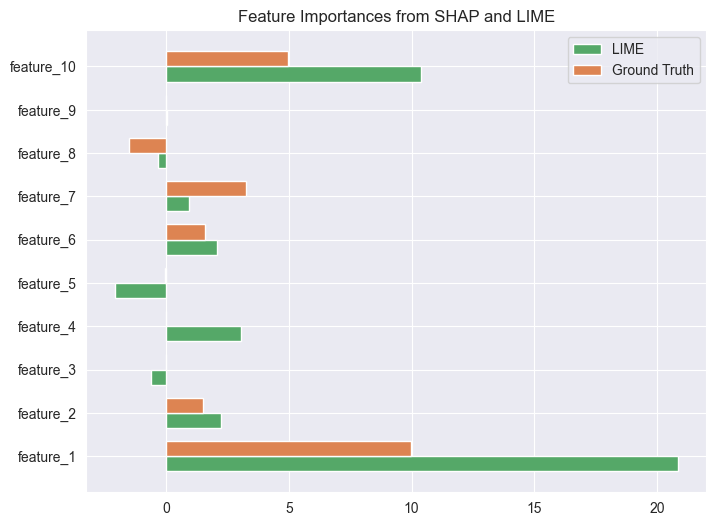

In [7]:


colors = sns.color_palette("deep")
plt.figure(figsize=(8, 6))

bar_positions = np.arange(len(results))  # Positions of the bars
bar_width = 0.35  # Bar widths

# plt.barh(bar_positions - bar_width/2, results['SHAP Value'], height=bar_width, label='SHAP', color=colors[0])  # PSHAP values
plt.barh(bar_positions - bar_width/2, results['LIME Value'], height=bar_width, label='LIME', color=colors[2])  # LIME values
plt.barh(bar_positions + bar_width/2, results['ground_truth'], height=bar_width, label='Ground Truth', color=colors[1])  # LIME values
plt.yticks(bar_positions, results.index)  #labels

plt.title('Feature Importances from SHAP and LIME')
plt.legend()
plt.show()